# DENGUE IN BRAZIL

###Introduction

Dengue is a viral infection that is spread from mosquitoes to people. It is more common in tropical and subtropical than in temperate climates. Most people who get dengue do not have symptoms. For those who do, the most common symptoms are high fever, headache, body aches, nausea and rash. Most get better in 1–2 weeks. Some develop severe dengue and need care in a hospital. In severe cases, dengue can be fatal. You can lower your risk of dengue by avoiding mosquito bites, especially during the day. Dengue is treated through pain management as there is no specific treatment currently (WHO, 2005).

###Symptoms

Most people with dengue have mild or no symptoms and will get better in 1–2 weeks. Rarely, dengue can be severe and lead to death.  

If symptoms occur, they usually begin 4–10 days after infection and last for 2–7 days. Symptoms may include:

high fever (40°C/104°F)
severe headache
pain behind the eyes
muscle and joint pains
nausea
vomiting
swollen glands
rash.

After recovery, people who have had dengue may experience fatigue for several weeks (WHO, 2005).

### Objective

 This report aims to analyze data on Dengue fever in Brazil, identifying epidemiological patterns, historical trends, and the regions most affected by the disease. Furthermore, it will discuss control and prevention strategies, including vaccine development and its impact on public health.

###Data Analysis

The data used in this analysis were collected from official sources, such as the Ministry of Health and state secretariats, including information on the geographic distribution of the disease, the historical evolution of cases, and seasonal patterns. The interpretation of this information allows us to understand the dynamics of Dengue in Brazil and to support public policy decisions.

The analysis revealed that Dengue has been expanding to previously less affected regions, demonstrating the influence of environmental and social factors on the transmission of the disease. The occurrence of cyclical outbreaks indicates the need for continuous preventive measures, preventing infection peaks from overwhelming health systems.

Health Ministry Data Base: https://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/snv/denguebr.def

Relevant Documents: https://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/d0203.pdf




In [7]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [8]:
df_dengue = pd.read_excel('Base de Dados Dengue.xlsx')

## Dataset Exploration

In [9]:
print(f'Dataset Size: {df_dengue.shape}')

Dataset Size: (728772, 4)


In [10]:
type(df_dengue)

pandas.core.frame.DataFrame

In [11]:
df_dengue.dtypes

,0
municipio,object
uf,object
data_infeccoes,datetime64[ns]
qtd_infeccoes,int64


Null Values?

In [12]:
df_dengue.isnull().sum()

,0
municipio,0
uf,0
data_infeccoes,0
qtd_infeccoes,0


In [13]:
print(f'Sum of Null Values: {df_dengue.isnull().sum().sum()}')

Sum of Null Values: 0


Database Info

In [14]:
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728772 entries, 0 to 728771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   municipio       728772 non-null  object        
 1   uf              728772 non-null  object        
 2   data_infeccoes  728772 non-null  datetime64[ns]
 3   qtd_infeccoes   728772 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.2+ MB


Per Year: Infections

In [15]:
df_dengue ['ano'] = df_dengue['data_infeccoes'].dt.year

In [16]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes,ano
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34,2013
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44,2013
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15,2013
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4,2013
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3,2013


In [17]:
infeccoes_municipios = df_dengue.groupby(['ano', 'municipio', 'uf'])['qtd_infeccoes'].sum().reset_index()

In [18]:
infeccoes_municipios.head()

,ano,municipio,uf,qtd_infeccoes
0,2013,ABADIA DE GOIAS,GO,52
1,2013,ABADIA DOS DOURADOS,MG,0
2,2013,ABADIANIA,GO,37
3,2013,ABAETE,MG,486
4,2013,ABAETETUBA,PA,15


In [19]:
infeccoes_municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60731 entries, 0 to 60730
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            60731 non-null  int32 
 1   municipio      60731 non-null  object
 2   uf             60731 non-null  object
 3   qtd_infeccoes  60731 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.6+ MB


State + Year

In [20]:
infeccoes_estado = df_dengue.groupby(['ano', 'uf'])['qtd_infeccoes'].sum().reset_index()

In [21]:
infeccoes_estado

,ano,uf,qtd_infeccoes
0,2013,AC,1663
1,2013,AL,704
2,2013,AM,4327
3,2013,AP,546
4,2013,BA,13417
...,...,...,...
292,2023,RS,27389
293,2023,SC,77954
294,2023,SE,1749
295,2023,SP,198774


Descriptive Statistics

In [22]:
infeccoes_estado.describe()

,ano,qtd_infeccoes
count,297.000000,297.000000
mean,2018.000000,12872.474747
std,3.167615,31630.107741
min,2013.000000,0.000000
25%,2015.000000,780.000000
50%,2018.000000,2229.000000
75%,2021.000000,10098.000000
max,2023.000000,286000.000000


For 10 years, a medium of almost 13000 cases of dengue were registered, with a total of 286000 dengue cases.

In [23]:
infeccoes_estado.shape

(297, 3)

Interpretation of Descriptive Statistics with BoxPlot Chart

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-469273009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = infeccoes_estado, x = 'ano', y = 'qtd_infeccoes', palette = 'viridis')


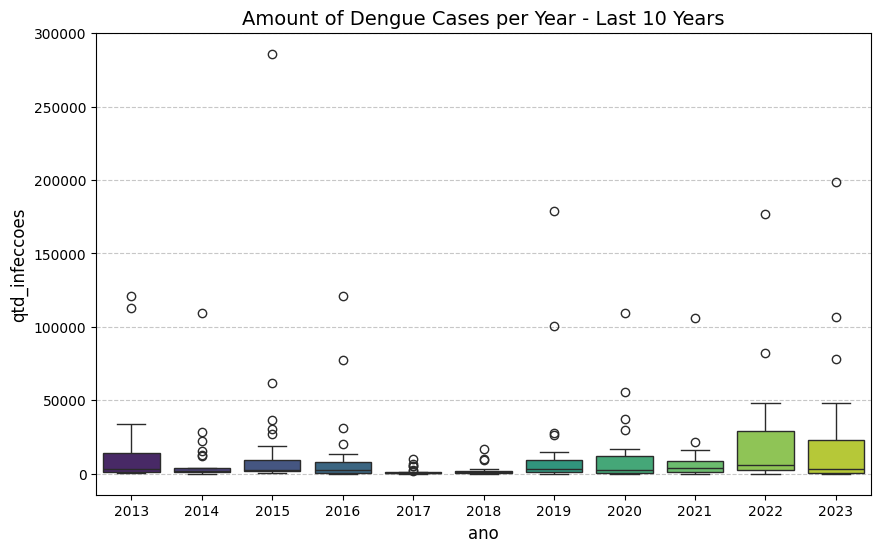

In [25]:
plt.figure(figsize = (10,6))
sns.boxplot(data = infeccoes_estado, x = 'ano', y = 'qtd_infeccoes', palette = 'viridis')

plt.title('Amount of Dengue Cases per Year - Last 10 Years', fontsize = 14)
plt.xlabel('ano', fontsize = 12)
plt.ylabel('qtd_infeccoes', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

###Interpretation

The boxplot chart presents the distribution of infections by year, highlighting a large variability in the number of confirmed cases (e.g. 2018 vs 2022). The presence of outliers demonstrates periods in which there were large-scale outbreaks (2022, 2023), which reinforces the need for continuous monitoring and understanding of the variables involved in the oscilation.

**Climate**: El Niño
Warmer temperatures and altered rainfall (more pockets of flooding and drought in different regions) accelerate Aedes mosquito reproduction and create more breeding sites. El Niño in 2023 is widely cited as a major amplifier (Reuters, 2024).

**Mutation**: Large-scale serotype shifts/ reintroductions
New or re-emerging dengue serotypes/genetic lineages (notably DENV-3 and expansions of DENV-2 in some regions) mean many people lacked immunity, enabling bigger epidemics and, in some contexts, more severe disease on secondary infections. Genomic surveillance papers and CDC/Fiocruz reports documented DENV-3 detections in 2023.

**Health Management**: Weakened or disrupted vector-control and health services
Pandemic-era disruption, shifting public-health priorities, and underfunded local control programs reduced routine mosquito control in some places, reducing ability to prevent outbreaks. Coverage and control efforts were then insufficient to stop explosive spread. (The Guardian, 2024).

###The Year of 2023

In [26]:
infeccoes_estado_2023 = infeccoes_estado[infeccoes_estado['ano'] == 2023]
infeccoes_estado_2023

,ano,uf,qtd_infeccoes
270,2023,AC,1781
271,2023,AL,473
272,2023,AM,3263
273,2023,AP,742
274,2023,BA,13249
275,2023,CE,7437
276,2023,DF,23710
277,2023,ES,0
278,2023,GO,21682
279,2023,MA,2428


In [27]:
top_5_estados_2023 = infeccoes_estado_2023.sort_values(by='qtd_infeccoes', ascending=False).head(5)
print(top_5_estados_2023)

      ano  uf  qtd_infeccoes
295  2023  SP         198774
280  2023  MG         106923
293  2023  SC          77954
287  2023  PR          48328
288  2023  RJ          27905


In [28]:
infeccoes_estado_2023.describe()

,ano,qtd_infeccoes
count,27.0,27.000000
mean,2023.0,22902.888889
std,0.0,43368.215001
min,2023.0,0.000000
25%,2023.0,744.000000
50%,2023.0,3263.000000
75%,2023.0,22696.000000
max,2023.0,198774.000000


In [29]:
import plotly.express as px

Bar Chart - Most Cases of Infection per State

/tmp/ipython-input-3231006943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(infeccoes_estado_2023, x = 'uf', y = 'qtd_infeccoes', palette = 'viridis')


Text(0, 0.5, 'Quantidade de Infecções')

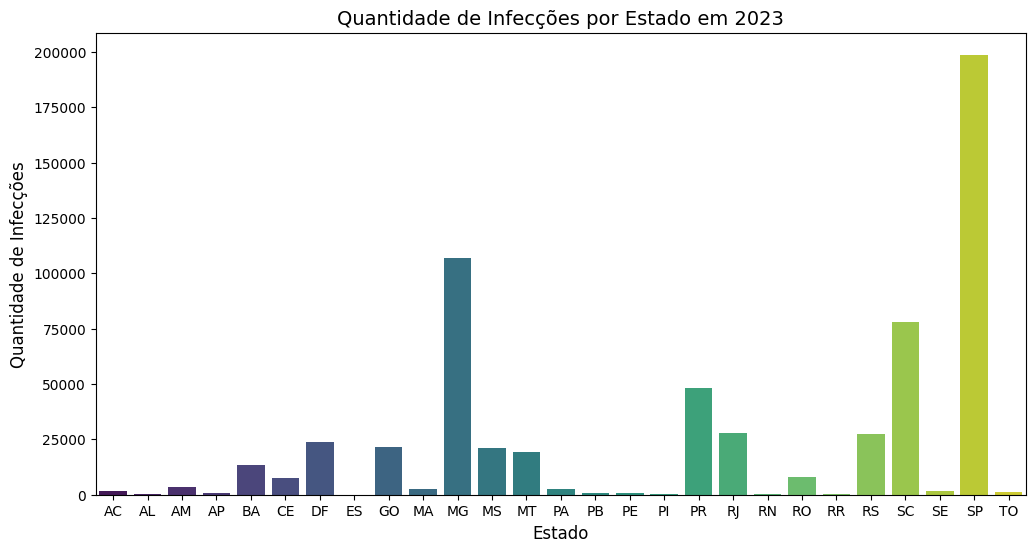

In [30]:
# Comparando a Quantidade de Infecções  por Estado em 2023

plt.figure(figsize = (12,6))
sns.barplot(infeccoes_estado_2023, x = 'uf', y = 'qtd_infeccoes', palette = 'viridis')

#Personalizando o Gráfico
plt.title('Quantidade de Infecções por Estado em 2023', fontsize = 14)
plt.xlabel('Estado', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)

In [31]:
infeccoes_2023 = infeccoes_estado_2023.sort_values(by = 'qtd_infeccoes', ascending=False)

In [32]:
infeccoes_2023

,ano,uf,qtd_infeccoes
295,2023,SP,198774
280,2023,MG,106923
293,2023,SC,77954
287,2023,PR,48328
288,2023,RJ,27905
292,2023,RS,27389
276,2023,DF,23710
278,2023,GO,21682
281,2023,MS,21098
282,2023,MT,19356


/tmp/ipython-input-3819582001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = infeccoes_2023, x = 'uf', y = 'qtd_infeccoes', palette = 'viridis')


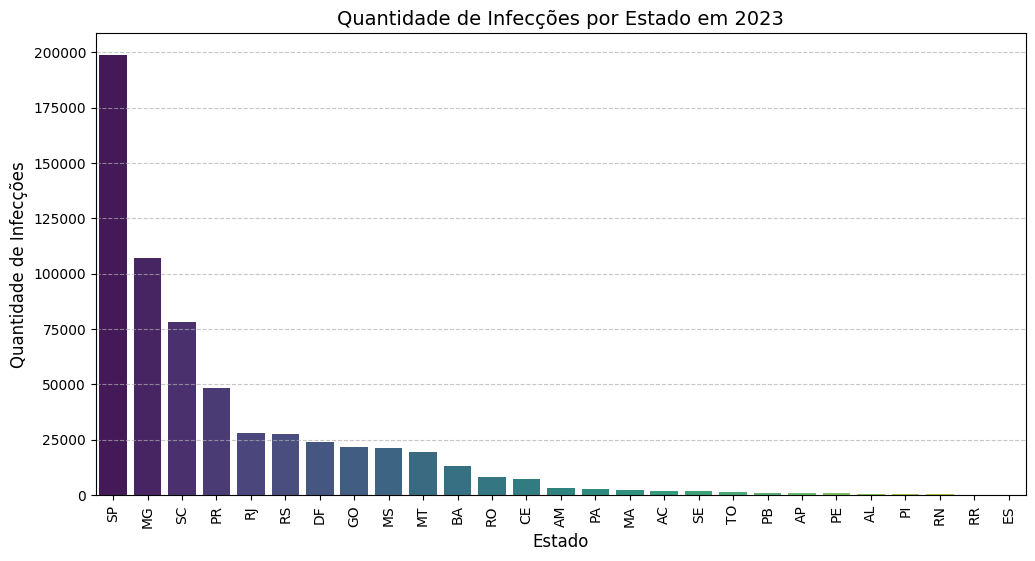

In [33]:

plt.figure(figsize = (12,6))
sns.barplot(data = infeccoes_2023, x = 'uf', y = 'qtd_infeccoes', palette = 'viridis')

plt.title('Quantidade de Infecções por Estado em 2023', fontsize = 14)
plt.xlabel('Estado', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.xticks(rotation = 90)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7);


###Incidence Rate

To allow meaningful comparisons between Brazilian states with different population sizes, dengue incidence rates were calculated instead of relying only on absolute case counts. The incidence rate standardizes the number of confirmed cases by population size, providing a clearer measure of infection risk.

The incidence rate was calculated using the following formula:

Incidence rate=(State population / Confirmed dengue cases)×100,000

Dengue case data were obtained from the Ministry of Health databases, together with the IBGE (brazilian Isntitute of Geography and Statistics) of 203.1 million. Expressing results per 100,000 inhabitants enables direct comparison across states and highlights regions with higher relative transmission risk, even when total case numbers are lower.

This approach supports more accurate epidemiological interpretation and improves decision-making for public health planning and resource allocation.

In [34]:
import pandas as pd

df_pop = pd.read_excel('ibge_populacao_estados_2023_proxy.xlsx')
df_pop.head()

,uf,estado,populacao_estimada
0,SP,São Paulo,46000000
1,MG,Minas Gerais,21300000
2,RJ,Rio de Janeiro,17200000
3,PR,Paraná,11800000
4,SC,Santa Catarina,8050000


In [35]:
df_incidencia = infeccoes_estado_2023.merge(
    df_pop,
    on='uf',
    how='inner'
)

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load IBGE population data (2023 proxy)
df_pop = pd.read_excel('ibge_populacao_estados_2023_proxy.xlsx')

df_pop.head()


,uf,estado,populacao_estimada
0,SP,São Paulo,46000000
1,MG,Minas Gerais,21300000
2,RJ,Rio de Janeiro,17200000
3,PR,Paraná,11800000
4,SC,Santa Catarina,8050000


In [37]:
infeccoes_estado_2023 = infeccoes_estado[infeccoes_estado['ano'] == 2023]


In [38]:
df_incidencia = infeccoes_estado_2023.merge(
    df_pop,
    on='uf',
    how='inner'
)

In [39]:
df_incidencia[['uf', 'qtd_infeccoes', 'populacao_estimada']].head()

,uf,qtd_infeccoes,populacao_estimada
0,MG,106923,21300000
1,PR,48328,11800000
2,RJ,27905,17200000
3,SC,77954,8050000
4,SP,198774,46000000


In [40]:
df_incidencia['incidencia'] = (
    df_incidencia['qtd_infeccoes'] / df_incidencia['populacao_estimada']
) * 100000

In [41]:
df_incidencia = df_incidencia.sort_values(
    by='incidencia',
    ascending=False
)

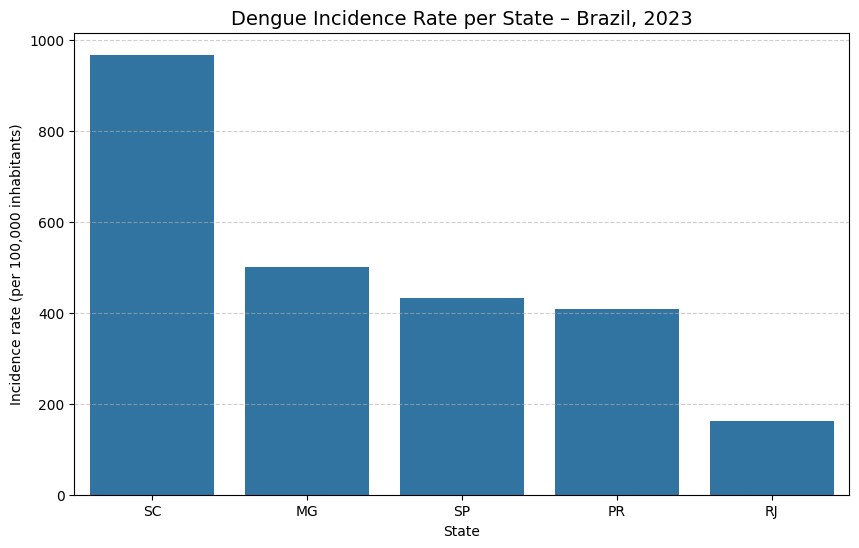

In [42]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=df_incidencia,
    x='uf',
    y='incidencia'
)

plt.title('Dengue Incidence Rate per State – Brazil, 2023', fontsize=14)
plt.xlabel('State')
plt.ylabel('Incidence rate (per 100,000 inhabitants)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

###The Santa Catarina Cases

Santa Catarina’s leading position in dengue incidence in 2023 is best explained by the convergence of climate-driven ecological change, low prior population immunity, and outbreak dynamics typical of newly affected regions, rather than by population size or rainfall volume alone. This pattern aligns with current scientific literature and contemporary public health reporting on dengue expansion in southern Brazil.

**Climate change and southward expansion of dengue transmission**

Multiple reports from Fiocruz, WHO, and major international media outlets highlighted that southern Brazil experienced unprecedented heat waves and milder winters in 2023, conditions strongly associated with the expansion of Aedes aegypti. News coverage emphasized that Santa Catarina crossed climatic thresholds that previously limited sustained transmission, allowing dengue to establish itself more efficiently than in past decades.

In [43]:
infeccoes_estado = (
    df_dengue
    .groupby(['ano', 'uf'])['qtd_infeccoes']
    .sum()
    .reset_index()
)

In [44]:
top_5_ufs = (
    infeccoes_estado_2023
    .sort_values(by='qtd_infeccoes', ascending=False)
    .head(5)['uf']
)

dados_top_5 = infeccoes_estado[infeccoes_estado['uf'].isin(top_5_ufs)]

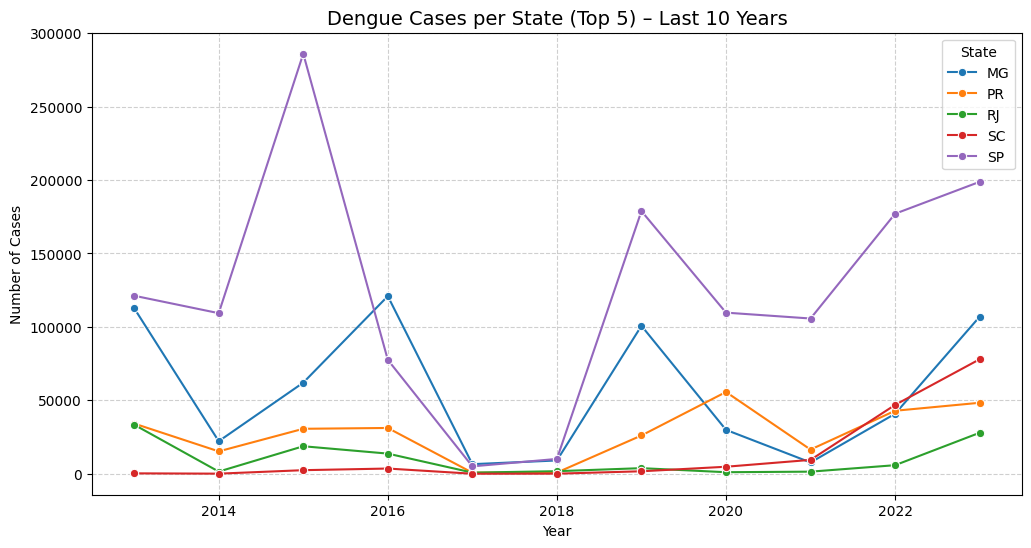

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=dados_top_5,
    x='ano',
    y='qtd_infeccoes',
    hue='uf',
    marker='o'
)

plt.title('Dengue Cases per State (Top 5) – Last 10 Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='State')
plt.show()


**Population size and urban density**

The states of São Paulo, Minas Gerais, Rio de Janeiro, Paraná and Santa Catarina concentrate a large proportion of Brazil’s population and host extensive metropolitan areas. High population density increases human–mosquito contact rates, meaning that even moderate transmission intensity can result in very high absolute case numbers. As a result, populous states tend to dominate national rankings during epidemic years.

**Urban infrastructure and the “modern city paradox”**

Highly urbanized environments provide numerous artificial breeding sites for Aedes aegypti, including rooftop water tanks, underground drainage systems, construction sites, and poorly sealed inspection boxes. These features are common in modern cities and are difficult to monitor systematically, making vector control more complex than in rural or less dense settings. Consequently, urban development can unintentionally amplify dengue transmission.

**Climate anomalies in 2023**

During 2023, South and Southeast Brazil experienced unusually high temperatures and irregular rainfall patterns, consistent with broader climate anomalies. Warmer conditions accelerated mosquito life cycles and viral replication, while short, intense rainfall events created persistent standing water. These factors extended transmission seasons and allowed dengue to circulate in areas and periods previously considered lower risk.

##Trend Chart - 10 years

In [50]:
top_5_ufs = (
    infeccoes_estado
    .groupby('uf')['qtd_infeccoes']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter dataset
dados_top_5 = infeccoes_estado[infeccoes_estado['uf'].isin(top_5_ufs)]

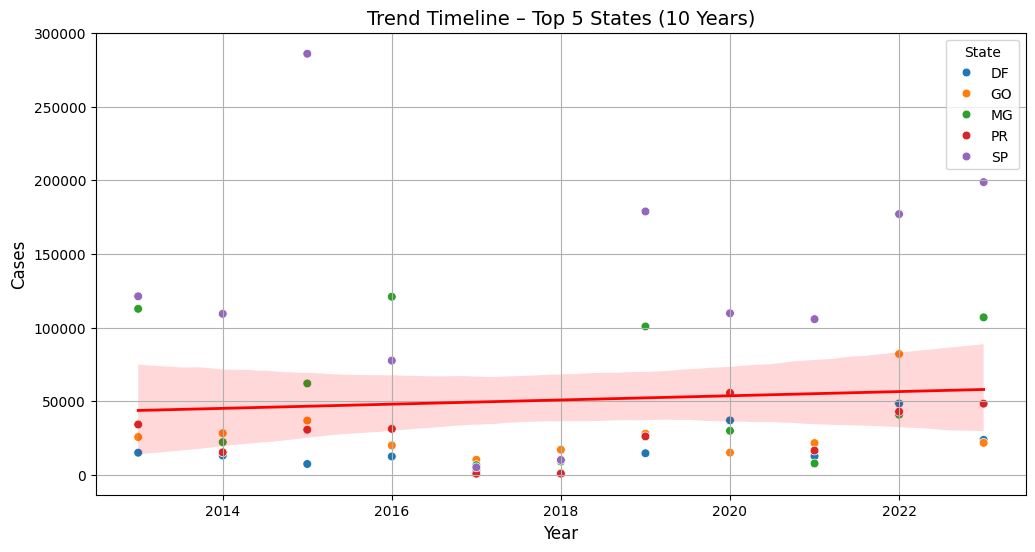

In [51]:
plt.figure(figsize=(12,6))

# Scatter points by state (different color per state)
sns.scatterplot(
    data=dados_top_5,
    x='ano',
    y='qtd_infeccoes',
    hue='uf',
    s=40
)

# Global regression line (no points)
sns.regplot(
    data=dados_top_5,
    x='ano',
    y='qtd_infeccoes',
    scatter=False,
    line_kws={"color": "red", "linewidth": 2}
)

plt.title('Trend Timeline – Top 5 States (10 Years)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cases', fontsize=12)
plt.grid(True)
plt.legend(title='State')
plt.show()

The trend analysis of the top five states reveals a sustained increase in dengue cases over the last decade, with pronounced spikes in 2022 and 2023. While highly populous states such as São Paulo and Minas Gerais consistently contribute the largest absolute number of cases, states like Santa Catarina exhibit more abrupt and concentrated outbreaks in recent years. The overall positive trend highlights the structural intensification of dengue transmission in Brazil, while inter-state variability underscores the importance of complementing absolute case counts with incidence-based indicators to assess relative risk.

##Insight & Conclusion




**1. Dengue has shifted from a seasonal to a structural risk**

The 2022–2024 period indicates that dengue transmission in Brazil is no longer confined to predictable seasonal peaks or traditionally endemic regions. Climate instability, urbanization, and population mobility have transformed dengue into a persistent, multi-regional threat, requiring long-term management rather than episodic emergency responses.

**2. Population-adjusted indicators are critical for decision-making**

The incidence rate analysis demonstrates that absolute case counts can mislead resource allocation. States with smaller populations but low historical exposure, such as those in the South, can experience higher relative risk and faster health-system overload. Management decisions must therefore prioritize incidence, growth rate, and severity, not only total cases.

**3. Reactive responses are insufficient under current conditions**

The scale and speed of recent outbreaks show that traditional reactive vector-control strategies—activated only after case surges—are no longer effective. Dengue management must shift toward anticipatory planning, integrating climate signals, surveillance data, and urban risk profiles.

###Administrative and health measures (2024–2027)

**1. Strengthen early-warning and integrated surveillance systems**

Health authorities should integrate epidemiological surveillance with climate and environmental data to anticipate outbreaks months in advance. Investments in real-time data integration, standardized reporting across states, and predictive modeling will allow earlier activation of control measures and reduce emergency-driven costs.

**2. Redesign vector control as a continuous urban service**

Vector control should be treated as a permanent public service, similar to sanitation or waste management, rather than as a temporary campaign. Municipal administrations should focus on high-risk urban infrastructure—water storage systems, construction sites, and drainage networks—using routine inspections and regulatory enforcement.

**3. Target prevention and vaccination strategies by risk profile**

Where vaccines are available, their deployment should prioritize high-incidence regions and populations with low prior exposure, rather than being distributed solely based on population size. Public communication campaigns should also be tailored to newly affected regions, where risk perception remains low and preventive behaviors are less established.

##References

World Health Organization. (2005). Dengue: Guidelines for diagnosis, treatment, prevention and control. Geneva: WHO.

World Health Organization. (2024). Dengue and severe dengue – Fact sheets and epidemiological updates. Geneva: WHO.

Ministério da Saúde. (2023). Sistema de Informação de Agravos de Notificação (SINAN) – Dengue. Departamento de Informática do SUS (DATASUS).
Available at: https://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/snv/denguebr.def

Ministério da Saúde. (2009). Indicadores e Dados Básicos – Brasil (IDB). DATASUS.
Available at: https://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/d0203.pdf

Instituto Brasileiro de Geografia e Estatística. (2022). Censo Demográfico 2022: Resultados preliminares. Rio de Janeiro: IBGE.

Instituto Brasileiro de Geografia e Estatística. (2024). Estimativas da população residente para os estados e municípios brasileiros. Rio de Janeiro: IBGE.

Fundação Oswaldo Cruz. (2023). Boletins epidemiológicos e análises sobre dengue no Brasil. Rio de Janeiro: Fiocruz.

Centers for Disease Control and Prevention. (2023). Dengue epidemiology and serotype circulation. Atlanta: CDC.

Reuters. (2024). El Niño fuels record dengue outbreaks across Latin America. Reuters Health.

The Guardian. (2024). Brazil struggles to contain dengue amid climate change and health system strain. London: The Guardian.